# Examples and exercises for graphical models

In [13]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

# Only needed to generate graphs, may be safely ommitted 
# once you comment out relevant cells below
from graphviz import Digraph, Graph

# The below are packages I used to solve these exercises, but may be safely removed
from causalgraphicalmodels import CausalGraphicalModel


from fake_data_for_learning.fake_data_for_learning import (
    BayesianNodeRV, SampleValue, FakeDataBayesianNetwork
)


In [14]:
datadir = Path(os.getcwd()) / 'data'

## Graphical models recap

Main assumptions:

1. The graph $G$ is a directed, acyclical graph (DAG)
2. The random variable(s) represented by $G$ follow the *Markov property*

Recall that a *path* is undirected, and $G$ has no loops, as it is a DAG.

Given a path, recall that a node $Z$ on the path is *blocked* by conditioning on a set of nodes $S$ in $G$ if

1. $Z$ is in $S$ and is a non-collider
2. neither $Z$ nor its descendents is in $S$ and $Z$ is a collider




## Graphical models example: Credit risk

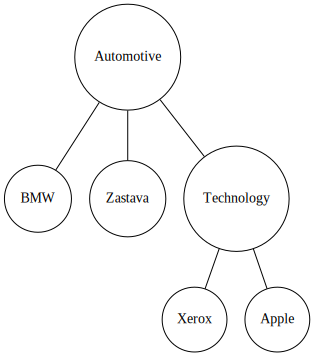

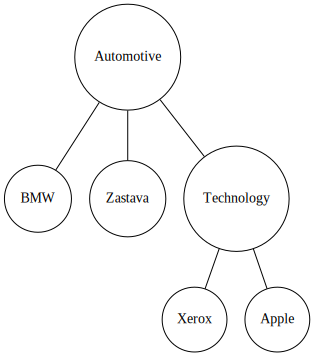

In [15]:
dot = Graph()
dot.attr('node', shape='circle')
dot.node('A', 'Automotive')
dot.node('b', 'BMW')
dot.node('z', 'Zastava')

dot.node('T', 'Technology')
dot.node('x', 'Xerox')
dot.node('a', 'Apple')

dot.edges(['Ab', 'Az', 'AT', 'Tx', 'Ta'])

dot

## Graphical models exercise: DAGs

Consider a directed, acyclical graph (DAG) $G$ with nodes $X_0, \ldots, X_4$ and [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix)

In [16]:
X = np.array([
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]
    ])

1. Draw the graph for $G$. Difficulty: *
2. What row or column properties of the matrix $X$ can be used to identify the nodes with no incoming edges? Difficulty: *
3. Write pseudo- (or better, real) code to implement your method to extract nodes with no incoming edges from $X$. Difficulty: **
4. Write pseudo- (or better, real) code to determine the parents of given node from $X$. Difficulty: **

## Graphical models exercise: conditional independence

Take K to be your Karma, H to be the hours you spend in the gym lifting weight each day, and then W be the weight you can bench press on a given day. For simplicity, all random variables are binary, with each row representing a day in your life.

In [17]:
df = pd.read_csv(datadir / 'karma_weights.csv').head()
df.head()

,karma,hours,weight
0,1,0,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,0,1


,karma,hours,weight
0,1,0,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,0,1


You are also the parent of a very young child, so perhaps Karma will punish you for devoting too much time to your triceps and neglecting your partner and baby. Let $G$ be a graphical model for $(K, H, W)$, as shown below.

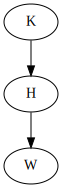

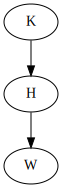

In [18]:
dot = Digraph(comment='d-sep-exercise-1')
dot.attr('node')
dot.node('K')
dot.node('H')
dot.node('W')

dot.edges(['KH', 'HW'])
dot

Difficulty: *

Determine all conditionally independent relationships $K \perp W | S$ for possible values of $S$, and justify your answer.

## Graphical models exercise: conditional independence 2

Difficulty: *

Same as above, but for $K \perp H | S$.

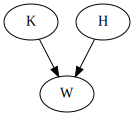

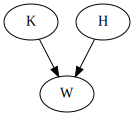

In [19]:
dot = Digraph()
dot.attr('node')
dot.node('K')
dot.node('H')
dot.node('W')

dot.edges(['HW', 'KW'])

dot

## Graphical models exercise: conditional independence 3

Difficulty: **

Determine all conditional independence relationships for the graph:

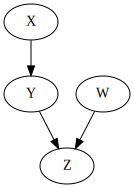

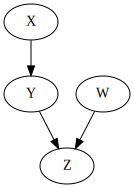

In [20]:
dot = Digraph(comment='d-sep-exercise-1')
dot.attr('node')
dot.node('X')
dot.node('Y')
dot.node('Z')
dot.node('W')

dot.edges(['XY', 'YZ', 'WZ'])

dot

## Graphical models exercise: d-separation for hit-rate

Difficulty: **

Find all (conditional) independence relations for 

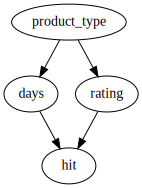

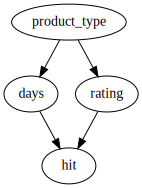

In [21]:
hits = CausalGraphicalModel(
    nodes=["product_type", "rating", "days", "hit"],
    edges=[
        ("product_type", "rating"), 
        ("product_type", "days"), 
        ("rating", "hit"),
     #   ("rating", "days"),
        ("days", "hit")
    ]
)
hits.draw()

## Graphical models exercise: model selection

Consider the following Bayesian network

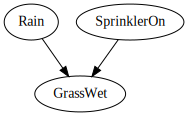

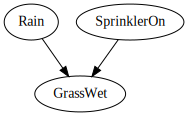

In [22]:
dot = Digraph()
dot.attr('node')
dot.node('X', 'Rain')
dot.node('Y', 'SprinklerOn')
dot.node('Z', 'GrassWet')

dot.edges(['XZ', 'YZ'])

dot

where 
$$
\begin{equation*}
\mathrm{Rain} \sim B(p_R) \\
\mathrm{SprinklerOn} \sim B(p_S)
\end{equation*}
$$

and $\mathrm{GrassWet}$ is Bernoulli conditioned on the values of $\mathrm{Rain}$ and $\mathrm{SprinklerOn}$.

1. Write down the probability distribution equation / decomposition for $(\mathrm{Rain}, \mathrm{SprinklerOn}, \mathrm{GrassWet})$. Difficulty: *
2. Given the data in `data/wet_grass.csv`, estimate the probability distribution of $(\mathrm{Rain}, \mathrm{SprinklerOn}, \mathrm{GrassWet})$. Difficulty: **

In [23]:
data = pd.read_csv(datadir / 'wet_grass.csv')
data.head()

,Rain,SprinklerOn,GrassWet
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,1,1,1


,Rain,SprinklerOn,GrassWet
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,1,1,1


## Graphical models exercise: model selection, continued

Consider the same data as above, `data/wet_grass.csv`, but with the graphical model

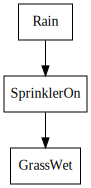

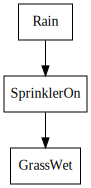

In [24]:
dot = Digraph()
dot.attr('node', shape='box')
dot.node('X', 'Rain')
dot.node('Y', 'SprinklerOn')
dot.node('Z', 'GrassWet')

dot.edges(['XY', 'YZ'])

dot

Evaluate which of the two graphical models is better for the given data.

Difficulty: **